# Experiments
#### Belen Martin Urcelay
#### Jan. 2025

## Imports

In [1]:
import os
import glob
import pandas as pd
import re
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Set notebook up to load files from Science repo
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Ensure that we re-load changes automagically
%load_ext autoreload
%autoreload 2

In [4]:
from science.agents import GridEnvironment, QLearningAgent_Bernoulli_greedy, QLearningAgent_Bernoulli_PbRL

In [5]:
num_iters_per_experiment = 4
grid_height = 5
grid_width = 10
num_steps = 10

## Load Data

In [6]:
# Function to calculate deviation of trajectory from the road
def calculate_deviation(trajectory, road):
    deviation = 0
    for step in trajectory:
        if not any(np.array_equal(step, road_step) for road_step in road):
            deviation -= 1
    return deviation

# LANGUAGE PROCESSING ALGORITHM

In [7]:
# Define the base directory where the pkl files are located
base_dir = 'human_experiments'

# List all .pkl files in the human_experiments directory
pkl_files = glob.glob(os.path.join(base_dir, 'nov*_*_*.pkl')) + glob.glob(os.path.join(base_dir, 'dec*_*_*.pkl'))

# Regex to extract day, participant, order, potential version, and experiment number
pattern = r'(nov|dec)(\d+)_postirb(\d+)_([a-z]+)_(\d+)_exp(\d+)\.pkl'

# To store the loaded data along with their metadata
experiments_data = []

# Loop over each .pkl file
for file_path in pkl_files:
    # Extract the metadata from the filename using regex
    filename = os.path.basename(file_path)
    match = re.match(pattern, filename.lower())
    if match:
        month, day, participant, experiment_type, order, experiment_number = match.groups()
        # Load the .pkl file
        data = pd.read_pickle(file_path)
        participant = int(participant)
        experiment_number = int(experiment_number)
        # Calculate deviations for each trajectory
        road = data['road'][1:]
        if experiment_type == 'rlhtf':
            deviations = [calculate_deviation(trajectory, road) for trajectory in data['trajectory']]
        else:
            deviations = data['reward']
        final_score = calculate_deviation(data['learned_trajectory'], road)
        
        # Append a tuple of the metadata and data to the experiments_data list
        experiments_data.append((month, day, participant, experiment_type, order, experiment_number, data, deviations, final_score))
    else:
        print(f"Filename {filename} did not match the pattern and was skipped.")
# Convert the list to a DataFrame
experiments_df = pd.DataFrame(experiments_data, columns=['Month', 'Day', 'participant', 'ExperimentType', 'AgentType', 'ExperimentNumber', 'Data', 'Deviation', 'Score'])

In [8]:
experiments_df

,Month,Day,participant,ExperimentType,AgentType,ExperimentNumber,Data,Deviation,Score
0,nov,22,1,pbrl,2,4,"{'human_feedback': [1, 0, 1, 1], 'trajectory':...","[-2, -4, -3, -4]",-4
1,nov,22,1,pbrl,2,5,"{'human_feedback': [1, 1, 1, 0], 'trajectory':...","[-3, -2, -5, -1]",-1
2,nov,22,1,pbrl,2,6,"{'human_feedback': [1, 0, 1, 1], 'trajectory':...","[-8, -8, -7, -6]",-4
3,nov,22,1,pbrl,2,7,"{'human_feedback': [1, 0, 1, 0], 'trajectory':...","[-4, -4, -3, -3]",-3
4,nov,22,1,rlhtf,1,0,"{'human_feedback': ['the beginning is good, bu...","[-8, -8]",-5
...,...,...,...,...,...,...,...,...,...
190,dec,6,20,rlhtf,2,7,{'human_feedback': ['the third step is wrong. ...,"[-9, -7, -6, -1]",-9
191,dec,6,20,sentiment,1,2,"{'human_feedback': ['very horrible', 'not too ...","[{1: ['NEG'], 2: ['NEG'], 3: ['NEG'], 4: ['NEG...",-4
192,dec,6,20,sentiment,1,3,"{'human_feedback': ['terrible', 'terrible', 's...","[{1: ['NEG'], 2: ['NEG'], 3: ['NEG'], 4: ['NEG...",-8
193,dec,6,20,sentiment,1,4,"{'human_feedback': ['terrible', 'bad', 'still ...","[{1: ['NEG'], 2: ['NEG'], 3: ['NEG'], 4: ['NEG...",-9


In [9]:
experiments_df[experiments_df['ExperimentType']== 'rlhtfnoinstruct']['Data'][8]

{'human_feedback': ['go left and go below the chair.',
  'the endpoint is bad. the endpoint is above the clock.',
  'in the chair is bad. the endpoint is at the bottle.',
  'go left.'],
 'trajectory': [[(0, 1),
   (0, 2),
   (0, 3),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4)],
  [(0, 1),
   (0, 2),
   (0, 3),
   (0, 4),
   (1, 4),
   (2, 4),
   (2, 4),
   (2, 4),
   (2, 4),
   (2, 4)],
  [(0, 1),
   (0, 2),
   (0, 3),
   (1, 3),
   (2, 3),
   (3, 3),
   (3, 4),
   (3, 4),
   (3, 4),
   (3, 4)],
  [(0, 1),
   (0, 2),
   (0, 3),
   (1, 3),
   (2, 3),
   (3, 3),
   (4, 3),
   (4, 4),
   (4, 4),
   (4, 4)]],
 'reward': [{14: ['POS'], 18: ['POS']},
  {14: ['NEG'], 44: ['NEG']},
  {19: ['NEG'], 43: ['POS']},
  {18: ['POS']}],
 'certainty': [{14: [1], 18: [1]},
  {14: [1], 44: [1]},
  {19: [1], 43: [1]},
  {18: [1]}],
 'alpha': [array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 1.5, 0.5, 0.5, 0.5, 2.5, 0.5, 0.5, 0.5, 0.5, 0.

In [10]:
experiments_df[experiments_df['ExperimentType']== 'sentiment']['Data'][192]

{'human_feedback': ['terrible',
  'terrible',
  'still bad but you are making progress',
  'still bad'],
 'trajectory': [[(0, 1),
   (0, 2),
   (0, 3),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4),
   (0, 4)],
  [(1, 0),
   (1, 1),
   (1, 2),
   (1, 3),
   (1, 4),
   (1, 4),
   (1, 4),
   (1, 4),
   (1, 4),
   (1, 4)],
  [(1, 0),
   (2, 0),
   (2, 1),
   (2, 2),
   (2, 3),
   (2, 4),
   (2, 4),
   (2, 4),
   (2, 4),
   (2, 4)],
  [(1, 0),
   (2, 0),
   (2, 1),
   (2, 2),
   (2, 3),
   (2, 4),
   (2, 4),
   (2, 4),
   (2, 4),
   (2, 4)]],
 'reward': [{1: ['NEG'], 2: ['NEG'], 3: ['NEG'], 4: ['NEG']},
  {5: ['NEG'], 6: ['NEG'], 7: ['NEG'], 8: ['NEG'], 9: ['NEG']},
  {5: ['POS'],
   10: ['POS'],
   11: ['POS'],
   12: ['POS'],
   13: ['POS'],
   14: ['POS']},
  {5: ['NEG'],
   10: ['NEG'],
   11: ['NEG'],
   12: ['NEG'],
   13: ['NEG'],
   14: ['NEG']}],
 'certainty': [{1: [1.0], 2: [1.0], 3: [1.0], 4: [1.0]},
  {5: [1.0], 6: [1.0], 7: [1.0], 8: [1.0], 9: [1.0]},
  {5: 

In [18]:
experiments_df[experiments_df['ExperimentType']== 'pbrl']['Data'][0]

{'human_feedback': [1, 0, 1, 1],
 'trajectory': [([(1, 0),
    (1, 1),
    (2, 1),
    (3, 1),
    (4, 1),
    (5, 1),
    (6, 1),
    (7, 1),
    (7, 2),
    (7, 3)],
   [(0, 1),
    (1, 1),
    (2, 1),
    (2, 2),
    (3, 2),
    (3, 3),
    (4, 3),
    (5, 3),
    (5, 4),
    (5, 4)]),
  ([(0, 1),
    (1, 1),
    (1, 2),
    (2, 2),
    (3, 2),
    (3, 3),
    (3, 4),
    (4, 4),
    (4, 4),
    (4, 4)],
   [(0, 1),
    (0, 2),
    (1, 2),
    (2, 2),
    (2, 3),
    (3, 3),
    (3, 4),
    (4, 4),
    (4, 4),
    (5, 4)]),
  ([(0, 1),
    (1, 1),
    (2, 1),
    (2, 2),
    (3, 2),
    (3, 3),
    (4, 3),
    (4, 4),
    (5, 4),
    (6, 4)],
   [(0, 1),
    (1, 1),
    (2, 1),
    (2, 2),
    (3, 2),
    (3, 3),
    (4, 3),
    (5, 3),
    (5, 4),
    (6, 4)]),
  ([(1, 0),
    (1, 1),
    (1, 2),
    (2, 2),
    (3, 2),
    (3, 3),
    (3, 4),
    (3, 4),
    (3, 4),
    (4, 4)],
   [(0, 1),
    (1, 1),
    (2, 1),
    (2, 2),
    (3, 2),
    (3, 3),
    (3, 4),
    (4, 4),
    (5,

In [33]:
filtered_df['Data'][0]

{'human_feedback': [1, 0, 1, 1],
 'trajectory': [([(1, 0),
    (1, 1),
    (2, 1),
    (3, 1),
    (4, 1),
    (5, 1),
    (6, 1),
    (7, 1),
    (7, 2),
    (7, 3)],
   [(0, 1),
    (1, 1),
    (2, 1),
    (2, 2),
    (3, 2),
    (3, 3),
    (4, 3),
    (5, 3),
    (5, 4),
    (5, 4)]),
  ([(0, 1),
    (1, 1),
    (1, 2),
    (2, 2),
    (3, 2),
    (3, 3),
    (3, 4),
    (4, 4),
    (4, 4),
    (4, 4)],
   [(0, 1),
    (0, 2),
    (1, 2),
    (2, 2),
    (2, 3),
    (3, 3),
    (3, 4),
    (4, 4),
    (4, 4),
    (5, 4)]),
  ([(0, 1),
    (1, 1),
    (2, 1),
    (2, 2),
    (3, 2),
    (3, 3),
    (4, 3),
    (4, 4),
    (5, 4),
    (6, 4)],
   [(0, 1),
    (1, 1),
    (2, 1),
    (2, 2),
    (3, 2),
    (3, 3),
    (4, 3),
    (5, 3),
    (5, 4),
    (6, 4)]),
  ([(1, 0),
    (1, 1),
    (1, 2),
    (2, 2),
    (3, 2),
    (3, 3),
    (3, 4),
    (3, 4),
    (3, 4),
    (4, 4)],
   [(0, 1),
    (1, 1),
    (2, 1),
    (2, 2),
    (3, 2),
    (3, 3),
    (3, 4),
    (4, 4),
    (5,

In [35]:
feedback_text = 'move around the clock while following the gray path, head to the toilet without exiting the gray path until you reach the star'

experiments_df[experiments_df['ExperimentType'] == 'rlhtfnoinstruct'].loc[experiments_df['Data'].apply(lambda x: feedback_text in x['human_feedback']), 'ExperimentNumber']


174    4
Name: ExperimentNumber, dtype: int64

In [11]:
exp5 = experiments_df[experiments_df['ExperimentNumber']==4]

In [12]:
exp5[exp5['ExperimentType'] == 'rlhtfnoinstruct']['Data'].apply(lambda x: x['human_feedback'][0]).tolist()

['try reaching the endpoint over the clock. go straight after passing over the clock',
 'go above the clock and then to the left of the toilet',
 'your start is correct, but you must turn right, right after the clock. three steps after that, turn left and immediately turn right. then, continue past the toilet',
 'move around the clock while following the gray path, head to the toilet without exiting the gray path until you reach the star']

In [13]:
exp5[exp5['ExperimentType'] == 'rlhtf']['Data'].apply(lambda x: x['human_feedback'][0]).tolist()

['go above the clock and pass the toilet',
 'go left of the clock, then up of the clock, then cross the toilet from the middle',
 'go above the clock till you get near toilet. ',
 'go above the clock then right above the toilet',
 'half of it is wrong. your first have is ok. after 2 steps turn and move 3 steps towards the chair and vase. then turn and move 1 step up towards the toilet. then, you should keep gping towards the toilet for 4 steps',
 'steps 1 and 2 are correct. go above the toaster and then through the toilet.',
 'the first half of the trajectory is good. the rest is bad. go above the clock. then go to the toilet. the endpoint is above the chair.',
 'steps 1 and 2 are good, after step 2 turn right ']

In [14]:
exp5[exp5['ExperimentType'] == 'sentiment']['Data'].apply(lambda x: x['human_feedback'][0]).tolist()

['bad.', 'it is terrible', 'horrible', 'bad', 'extremely bad', 'terrible']

## Compute Experiment Scores

In [11]:
filtered_df = experiments_df[
    experiments_df['Data'].apply(lambda data: len(data['trajectory']) == 4)
]

In [12]:
filtered_df

,Month,Day,participant,ExperimentType,AgentType,ExperimentNumber,Data,Deviation,Score
0,nov,22,1,pbrl,2,4,"{'human_feedback': [1, 0, 1, 1], 'trajectory':...","[-2, -4, -3, -4]",-4
1,nov,22,1,pbrl,2,5,"{'human_feedback': [1, 1, 1, 0], 'trajectory':...","[-3, -2, -5, -1]",-1
2,nov,22,1,pbrl,2,6,"{'human_feedback': [1, 0, 1, 1], 'trajectory':...","[-8, -8, -7, -6]",-4
3,nov,22,1,pbrl,2,7,"{'human_feedback': [1, 0, 1, 0], 'trajectory':...","[-4, -4, -3, -3]",-3
5,nov,22,1,rlhtf,1,1,{'human_feedback': ['the route is very bad. pl...,"[-10, -8, -6, -7]",-5
...,...,...,...,...,...,...,...,...,...
190,dec,6,20,rlhtf,2,7,{'human_feedback': ['the third step is wrong. ...,"[-9, -7, -6, -1]",-9
191,dec,6,20,sentiment,1,2,"{'human_feedback': ['very horrible', 'not too ...","[{1: ['NEG'], 2: ['NEG'], 3: ['NEG'], 4: ['NEG...",-4
192,dec,6,20,sentiment,1,3,"{'human_feedback': ['terrible', 'terrible', 's...","[{1: ['NEG'], 2: ['NEG'], 3: ['NEG'], 4: ['NEG...",-8
193,dec,6,20,sentiment,1,4,"{'human_feedback': ['terrible', 'bad', 'still ...","[{1: ['NEG'], 2: ['NEG'], 3: ['NEG'], 4: ['NEG...",-9


In [13]:
filtered_df

,Month,Day,participant,ExperimentType,AgentType,ExperimentNumber,Data,Deviation,Score
0,nov,22,1,pbrl,2,4,"{'human_feedback': [1, 0, 1, 1], 'trajectory':...","[-2, -4, -3, -4]",-4
1,nov,22,1,pbrl,2,5,"{'human_feedback': [1, 1, 1, 0], 'trajectory':...","[-3, -2, -5, -1]",-1
2,nov,22,1,pbrl,2,6,"{'human_feedback': [1, 0, 1, 1], 'trajectory':...","[-8, -8, -7, -6]",-4
3,nov,22,1,pbrl,2,7,"{'human_feedback': [1, 0, 1, 0], 'trajectory':...","[-4, -4, -3, -3]",-3
5,nov,22,1,rlhtf,1,1,{'human_feedback': ['the route is very bad. pl...,"[-10, -8, -6, -7]",-5
...,...,...,...,...,...,...,...,...,...
190,dec,6,20,rlhtf,2,7,{'human_feedback': ['the third step is wrong. ...,"[-9, -7, -6, -1]",-9
191,dec,6,20,sentiment,1,2,"{'human_feedback': ['very horrible', 'not too ...","[{1: ['NEG'], 2: ['NEG'], 3: ['NEG'], 4: ['NEG...",-4
192,dec,6,20,sentiment,1,3,"{'human_feedback': ['terrible', 'terrible', 's...","[{1: ['NEG'], 2: ['NEG'], 3: ['NEG'], 4: ['NEG...",-8
193,dec,6,20,sentiment,1,4,"{'human_feedback': ['terrible', 'bad', 'still ...","[{1: ['NEG'], 2: ['NEG'], 3: ['NEG'], 4: ['NEG...",-9


In [14]:
def calculate_deviation(trajectory, road):   
    deviation = 0
    for step in trajectory:
        if not any(np.array_equal(step, road_step) for road_step in road):
            deviation -= 1
    return 10+deviation

In [15]:
def calculate_computed_scores(row):
    index = row.name  # Get the index of the row
    data_entry = experiments_df['Data'][index]
    
    # Extract road and trajectories
    road = data_entry['road']
    trajectories = data_entry['trajectory']  # Assuming it's a list of four trajectories
    learned_trajectory = data_entry['learned_trajectory']  # The additional trajectory
    
    # Compute deviations
    scores = [calculate_deviation(traj, road) for traj in trajectories]
    learned_score = calculate_deviation(learned_trajectory, road)
    
    # Append the learned score
    scores.append(learned_score)
    return scores

In [16]:
# Safely assigning the new column
filtered_df = filtered_df.copy()  # Ensure it's a separate copy to avoid the warning

filtered_df['ComputedScore'] = filtered_df.apply(calculate_computed_scores, axis=1)

In [17]:
filtered_df[filtered_df['ExperimentType'] == 'pbrl']

,Month,Day,participant,ExperimentType,AgentType,ExperimentNumber,Data,Deviation,Score,ComputedScore
0,nov,22,1,pbrl,2,4,"{'human_feedback': [1, 0, 1, 1], 'trajectory':...","[-2, -4, -3, -4]",-4,"[8, 8, 8, 8, 6]"
1,nov,22,1,pbrl,2,5,"{'human_feedback': [1, 1, 1, 0], 'trajectory':...","[-3, -2, -5, -1]",-1,"[8, 8, 8, 8, 9]"
2,nov,22,1,pbrl,2,6,"{'human_feedback': [1, 0, 1, 1], 'trajectory':...","[-8, -8, -7, -6]",-4,"[8, 8, 8, 8, 6]"
3,nov,22,1,pbrl,2,7,"{'human_feedback': [1, 0, 1, 0], 'trajectory':...","[-4, -4, -3, -3]",-3,"[8, 8, 8, 8, 7]"
16,nov,25,3,pbrl,1,0,"{'human_feedback': [1, 1, 0, 0], 'trajectory':...","[-8, -8, -8, -7]",-7,"[8, 8, 8, 8, 3]"
17,nov,25,3,pbrl,1,1,"{'human_feedback': [0, 1, 0, 1], 'trajectory':...","[-7, -8, -8, -7]",-7,"[8, 8, 8, 8, 3]"
18,nov,25,3,pbrl,1,2,"{'human_feedback': [0, 1, 0, 1], 'trajectory':...","[-10, -10, -6, -4]",-4,"[8, 8, 8, 8, 6]"
19,nov,25,3,pbrl,1,3,"{'human_feedback': [0, 0, 1, 1], 'trajectory':...","[-6, -6, -5, -6]",-6,"[8, 8, 8, 8, 4]"
31,nov,25,5,pbrl,2,4,"{'human_feedback': [0, 0, 1, 1], 'trajectory':...","[-3, -4, -4, -4]",-4,"[8, 8, 8, 8, 6]"
32,nov,25,5,pbrl,2,5,"{'human_feedback': [1, 0, 1, 1], 'trajectory':...","[-7, -5, -5, -6]",-6,"[8, 8, 8, 8, 4]"


#### Deviations for pbrl

In [18]:
to_complete = filtered_df[(filtered_df['ExperimentType'] == 'pbrl')]

In [19]:
deviation_PbRL = np.zeros([len(to_complete), 5])
for ee in range(len(to_complete)):
    road = to_complete['Data'].iloc[ee]['road'][1:]
    env = GridEnvironment(grid_width, grid_height, num_steps, [0,0])
    agent_Bernoulli = QLearningAgent_Bernoulli_PbRL(env, alpha_init = 0.5, beta_init = 0.5)
    trajectory = agent_Bernoulli.get_optimal_trajectory()
    deviation_PbRL[ee, 0] = calculate_deviation(trajectory, road)
    for ii in range(num_iters_per_experiment):
        traj1 = to_complete['Data'].iloc[ee]['trajectory'][ii][0]
        traj2 = to_complete['Data'].iloc[ee]['trajectory'][ii][1]
        human_feedback = to_complete['Data'].iloc[ee]['human_feedback'][ii]
            
        # Update alpha and beta based on feedback
        for state1, state2 in zip(traj1, traj2):
            idx1 = agent_Bernoulli.state_to_index(state1)
            idx2 = agent_Bernoulli.state_to_index(state2)

            if idx1 != idx2:
                if human_feedback == 0: # Trajectory 1 is prefered
                    agent_Bernoulli.alpha[idx1] += agent_Bernoulli.scale
                    agent_Bernoulli.beta[idx2] += agent_Bernoulli.scale
                else: # Trajectory 2 is prefered
                    agent_Bernoulli.beta[idx1] += agent_Bernoulli.scale
                    agent_Bernoulli.alpha[idx2] += agent_Bernoulli.scale
        trajectory = agent_Bernoulli.get_optimal_trajectory()
        #print(f"trajectory: {trajectory}")
        deviation_PbRL[ee, ii+1] = calculate_deviation(trajectory, road)

In [20]:
# Get the indices where ['ExperimentType'] == 'pbrl'
pbrl_indices = filtered_df[(filtered_df['ExperimentType'] == 'pbrl')].index
for i, idx in enumerate(pbrl_indices):
    filtered_df.at[idx, 'ComputedScore'] = deviation_PbRL[i].tolist()

In [21]:
filtered_df

,Month,Day,participant,ExperimentType,AgentType,ExperimentNumber,Data,Deviation,Score,ComputedScore
0,nov,22,1,pbrl,2,4,"{'human_feedback': [1, 0, 1, 1], 'trajectory':...","[-2, -4, -3, -4]",-4,"[2.0, 8.0, 6.0, 7.0, 6.0]"
1,nov,22,1,pbrl,2,5,"{'human_feedback': [1, 1, 1, 0], 'trajectory':...","[-3, -2, -5, -1]",-1,"[0.0, 8.0, 9.0, 6.0, 9.0]"
2,nov,22,1,pbrl,2,6,"{'human_feedback': [1, 0, 1, 1], 'trajectory':...","[-8, -8, -7, -6]",-4,"[2.0, 2.0, 2.0, 5.0, 6.0]"
3,nov,22,1,pbrl,2,7,"{'human_feedback': [1, 0, 1, 0], 'trajectory':...","[-4, -4, -3, -3]",-3,"[1.0, 6.0, 6.0, 7.0, 7.0]"
5,nov,22,1,rlhtf,1,1,{'human_feedback': ['the route is very bad. pl...,"[-10, -8, -6, -7]",-5,"[0, 2, 4, 3, 5]"
...,...,...,...,...,...,...,...,...,...,...
190,dec,6,20,rlhtf,2,7,{'human_feedback': ['the third step is wrong. ...,"[-9, -7, -6, -1]",-9,"[1, 3, 4, 9, 1]"
191,dec,6,20,sentiment,1,2,"{'human_feedback': ['very horrible', 'not too ...","[{1: ['NEG'], 2: ['NEG'], 3: ['NEG'], 4: ['NEG...",-4,"[0, 1, 1, 2, 6]"
192,dec,6,20,sentiment,1,3,"{'human_feedback': ['terrible', 'terrible', 's...","[{1: ['NEG'], 2: ['NEG'], 3: ['NEG'], 4: ['NEG...",-8,"[0, 3, 3, 3, 2]"
193,dec,6,20,sentiment,1,4,"{'human_feedback': ['terrible', 'bad', 'still ...","[{1: ['NEG'], 2: ['NEG'], 3: ['NEG'], 4: ['NEG...",-9,"[2, 1, 1, 2, 1]"


## Experiment Count

In [22]:
# Create the summary table
summary_table = (
    filtered_df
    .groupby(['ExperimentType', 'AgentType'])
    .size()  # Count occurrences
    .unstack(fill_value=0)  # Make columns for each 'AgentType', filling missing values with 0
    .rename(columns={1: 'Count_AgentType_1', 2: 'Count_AgentType_2'})  # Rename columns
)

# Add total counts for each 'ExperimentType'
summary_table['Total'] = summary_table.sum(axis=1)

# Reset the index to turn it into a standard table
summary_table = summary_table.reset_index()

print(summary_table)

AgentType   ExperimentType   1   2  Total
0                     pbrl  24  32     56
1                    rlhtf  27  24     51
2          rlhtfnoinstruct  23  22     45
3                sentiment  24  17     41


In [23]:
56+51+45+41

193

## Experiment Results

In [24]:
score_sentiment = filtered_df[(filtered_df['ExperimentType'] == 'sentiment')]['ComputedScore']
score_pbrl = filtered_df[(filtered_df['ExperimentType'] == 'pbrl')]['ComputedScore']
score_rlhtfnoinstruct = filtered_df[(filtered_df['ExperimentType'] == 'rlhtfnoinstruct')]['ComputedScore']
score_rlhtf = filtered_df[(filtered_df['ExperimentType'] == 'rlhtf')]['ComputedScore']

In [25]:
df = pd.DataFrame(score_sentiment.values.tolist())
score_sentiment_mean = df.mean(axis=0).tolist()
score_sentiment_ste = (df.std(axis=0) / np.sqrt(len(df))).tolist()

df = pd.DataFrame(score_pbrl.values.tolist())
score_pbrl_mean = df.mean(axis=0).tolist()
score_pbrl_ste = (df.std(axis=0) / np.sqrt(len(df))).tolist()

df = pd.DataFrame(score_rlhtfnoinstruct.values.tolist())
score_rlhtfnoinstruct_mean = df.mean(axis=0).tolist()
score_rlhtfnoinstruct_ste = (df.std(axis=0) / np.sqrt(len(df))).tolist()

df = pd.DataFrame(score_rlhtf.values.tolist())
score_rlhtf_mean = df.mean(axis=0).tolist()
score_rlhtf_ste = (df.std(axis=0) / np.sqrt(len(df))).tolist()

In [25]:
from scipy.stats import ttest_ind
df_rlhtf = pd.DataFrame(score_rlhtf.values.tolist())
df_pbrl = pd.DataFrame(score_pbrl.values.tolist())
df_rlhtfnoinstruct = pd.DataFrame(score_rlhtfnoinstruct.values.tolist())
df_sentiment = pd.DataFrame(score_sentiment.values.tolist())
df_true_state = pd.DataFrame(reward_true_UCB_state)
df_true_trajectory = pd.DataFrame(reward_true_UCB_trajectory)

# Compute error (10 - score)
error_rlhtf = 10 - df_rlhtf
error_pbrl = 10 - df_pbrl
error_rlhtfnoinstruct = 10 - df_rlhtfnoinstruct
error_sentiment = 10 - df_sentiment
error_true_state  = - df_true_state
error_true_trajectory  = - df_true_trajectory 

# Extract the last column (final step)
last_step_error_rlhtf = error_rlhtf.iloc[:, -1]  # Last column
last_step_error_pbrl = error_pbrl.iloc[:, -1]    # Last column
last_step_error_rlhtfnoinstruct = error_rlhtfnoinstruct.iloc[:, -1] 
last_step_error_sentiment = error_sentiment.iloc[:, -1]  # Last column
last_step_error_true_state = error_true_state.iloc[:, -1]  
last_step_error_true_trajectory = error_true_trajectory.iloc[:, -1]  

NameError: name 'reward_true_UCB_state' is not defined

In [64]:
# Perform Welch's t-test (independent t-test with unequal variances)
t_stat, p_value = ttest_ind(last_step_error_rlhtf, last_step_error_true_state, equal_var=False)
print(f"RLHTF & true state: T-statistic: {t_stat}, P-value: {p_value}")

RLHTF & true state: T-statistic: 1.3670384494694685, P-value: 0.1751803521973732


In [65]:
# Perform Welch's t-test (independent t-test with unequal variances)
t_stat, p_value = ttest_ind(last_step_error_rlhtf, last_step_error_true_trajectory, equal_var=False)
print(f"RLHTF & true traj: T-statistic: {t_stat}, P-value: {p_value}")

RLHTF & true traj: T-statistic: -6.263320340874589, P-value: 1.871032836403144e-08


In [66]:
# Perform Welch's t-test (independent t-test with unequal variances)
t_stat, p_value = ttest_ind(last_step_error_rlhtfnoinstruct, last_step_error_true_state, equal_var=False)
print(f"RLHTFnoinstruct & true state: T-statistic: {t_stat}, P-value: {p_value}")

RLHTFnoinstruct & true state: T-statistic: 5.422446307306214, P-value: 6.409357523637133e-07


In [67]:
# Perform Welch's t-test (independent t-test with unequal variances)
t_stat, p_value = ttest_ind(last_step_error_rlhtfnoinstruct, last_step_error_true_trajectory, equal_var=False)
print(f"RLHTF noinstruct& true traj: T-statistic: {t_stat}, P-value: {p_value}")

RLHTF noinstruct& true traj: T-statistic: -2.1022588072521313, P-value: 0.03910207603236055


In [68]:
# Perform Welch's t-test (independent t-test with unequal variances)
t_stat, p_value = ttest_ind(last_step_error_pbrl, last_step_error_true_state, equal_var=False)
print(f"pbrl & true state: T-statistic: {t_stat}, P-value: {p_value}")

pbrl & true state: T-statistic: 5.3831259008734555, P-value: 4.833773696008359e-07


In [70]:
# Perform Welch's t-test (independent t-test with unequal variances)
t_stat, p_value = ttest_ind(last_step_error_sentiment, last_step_error_true_trajectory, equal_var=False)
print(f"sentiment & true traj: T-statistic: {t_stat}, P-value: {p_value}")

sentiment & true traj: T-statistic: 4.305535561282904, P-value: 4.4734659840038364e-05


In [71]:
# Perform Welch's t-test (independent t-test with unequal variances)
t_stat, p_value = ttest_ind(last_step_error_sentiment, last_step_error_true_state, equal_var=False)
print(f"sentiment & true state: T-statistic: {t_stat}, P-value: {p_value}")

sentiment & true state: T-statistic: 13.697754343664212, P-value: 1.9901104435178167e-23


In [72]:
# Perform Welch's t-test (independent t-test with unequal variances)
t_stat, p_value = ttest_ind(last_step_error_true_trajectory, last_step_error_true_state, equal_var=False)
print(f"true trajectory & true state: T-statistic: {t_stat}, P-value: {p_value}")

true trajectory & true state: T-statistic: 10.145312922807063, P-value: 1.1635127044842887e-16


In [69]:
# Perform Welch's t-test (independent t-test with unequal variances)
t_stat, p_value = ttest_ind(last_step_error_pbrl, last_step_error_true_trajectory, equal_var=False)
print(f"pbrl & true traj: T-statistic: {t_stat}, P-value: {p_value}")

pbrl & true traj: T-statistic: -3.163956690049944, P-value: 0.0020931755492577865


In [38]:
# Perform Welch's t-test (independent t-test with unequal variances)
t_stat, p_value = ttest_ind(last_step_error_rlhtf, last_step_error_pbrl, equal_var=False)
print(f"RLHTF & PbRL: T-statistic: {t_stat}, P-value: {p_value}")

RLHTF & PbRL: T-statistic: -3.1220000176905516, P-value: 0.0023538920625062153


In [50]:
# Perform Welch's t-test (independent t-test with unequal variances)
t_stat, p_value = ttest_ind(last_step_error_sentiment, last_step_error_pbrl, equal_var=False)
print(f"sentiment & PbRL: T-statistic: {t_stat}, P-value: {p_value}")

sentiment & PbRL: T-statistic: 6.574278335622203, P-value: 2.73264848590749e-09


In [39]:
t_stat, p_value = ttest_ind(last_step_error_rlhtfnoinstruct, last_step_error_pbrl, equal_var=False)
print(f"RLHTF No Instructions & PbRL: T-statistic: {t_stat}, P-value: {p_value}")

RLHTF No Instructions & PbRL: T-statistic: 0.5952840855051788, P-value: 0.5531293853244452


In [49]:
t_stat, p_value = ttest_ind(last_step_error_rlhtfnoinstruct, last_step_error_sentiment, equal_var=False)
print(f"RLHTF No Instructions & sentiment: T-statistic: {t_stat}, P-value: {p_value}")

RLHTF No Instructions & sentiment: T-statistic: -5.153511825448568, P-value: 2.0860811897678642e-06


In [41]:
# Perform Welch's t-test (independent t-test with unequal variances)
t_stat, p_value = ttest_ind(last_step_error_rlhtf, last_step_error_sentiment, equal_var=False)
print(f"RLHTF & sentiment: T-statistic: {t_stat}, P-value: {p_value}")

RLHTF & sentiment: T-statistic: -9.181456977487613, P-value: 3.435248030678012e-14


In [42]:
t_stat, p_value = ttest_ind(last_step_error_rlhtf, last_step_error_rlhtfnoinstruct,equal_var=False)
print(f"RLHTF & RLHTF No Instructions: T-statistic: {t_stat}, P-value: {p_value}")

RLHTF & RLHTF No Instructions: T-statistic: -3.4197973216981445, P-value: 0.0009294523028432716


In [22]:
with open('human_experiments/grid_true_trajectory_greedy.pickle', 'rb') as f:
    reward_true_UCB_trajectory = pickle.load(f)
with open('human_experiments/grid_true_state_greedy.pickle', 'rb') as f:
    reward_true_UCB_state = pickle.load(f)

NameError: name 'pickle' is not defined

In [34]:
# Define the means and standard errors (replace these with the values you computed)
means = {
    'score_sentiment': score_sentiment_mean,
    'score_pbrl': score_pbrl_mean,
    'score_rlhtfnoinstruct': score_rlhtfnoinstruct_mean,
    'score_rlhtf': score_rlhtf_mean
}

stes = {
    'score_sentiment': score_sentiment_ste,
    'score_pbrl': score_pbrl_ste,
    'score_rlhtfnoinstruct': score_rlhtfnoinstruct_ste,
    'score_rlhtf': score_rlhtf_ste
}

In [35]:
means

{'score_sentiment': [0.8292682926829268,
  1.6341463414634145,
  2.0,
  2.4390243902439024,
  2.4390243902439024],
 'score_pbrl': [0.8392857142857143,
  4.071428571428571,
  4.160714285714286,
  4.892857142857143,
  5.125],
 'score_rlhtfnoinstruct': [0.8,
  3.4444444444444446,
  4.044444444444444,
  4.2444444444444445,
  4.822222222222222],
 'score_rlhtf': [0.9215686274509803,
  4.803921568627451,
  5.705882352941177,
  6.411764705882353,
  6.7254901960784315]}

In [32]:
stes

{'score_sentiment': [0.14775737786205814,
  0.11453031104267215,
  0.1600304849007244,
  0.23177149303813852,
  0.2470528246263532],
 'score_pbrl': [0.12425566885676752,
  0.35204148853153,
  0.32511415149572154,
  0.3199823163017381,
  0.32539935503891254],
 'score_rlhtfnoinstruct': [0.13706888336846837,
  0.32497949516598573,
  0.4007008450550534,
  0.39332249029167915,
  0.3909182260828038],
 'score_rlhtf': [0.1308887785747344,
  0.3464323580448278,
  0.37708283549005855,
  0.3653378458876545,
  0.3961366682093927]}

In [52]:
3.2745098039215685 / 9.07843137254902

0.36069114470842334

In [53]:
1 - 0.36

0.64

In [26]:
(10 - 6.7254901960784315) / (10-0.9215686274509803)

0.36069114470842334

In [27]:
score_sentiment_mean

[0.8292682926829268,
 1.6341463414634145,
 2.0,
 2.4390243902439024,
 2.4390243902439024]

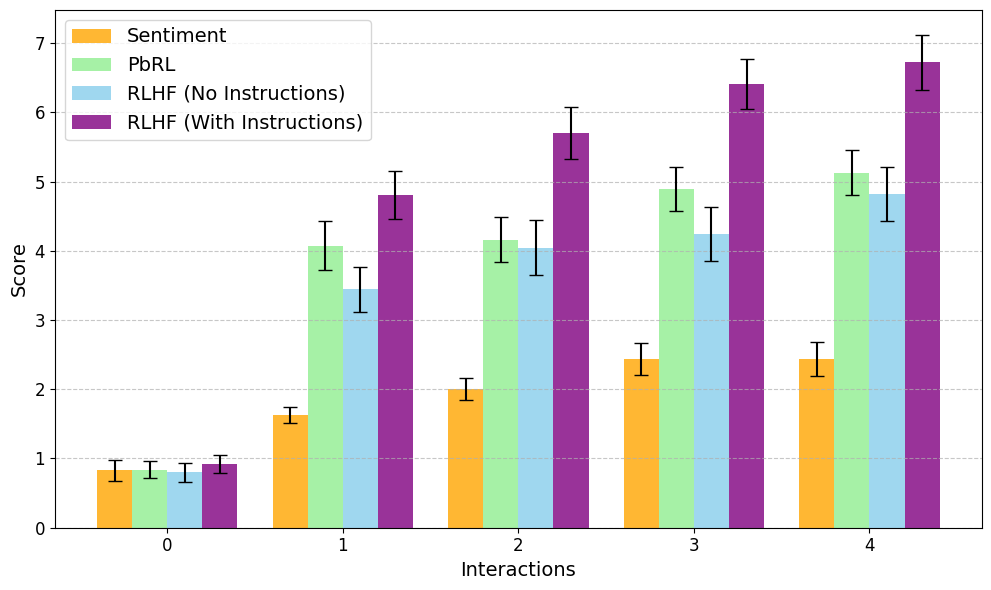

In [28]:
# Create the x-axis positions for the bars
x = np.arange(5)  # 5 steps

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Width of the bars
bar_width = 0.2

# Position offsets for the bars
positions = {
    'score_sentiment': x - 1.5 * bar_width,
    'score_pbrl': x - 0.5 * bar_width,
    'score_rlhtfnoinstruct': x + 0.5 * bar_width,
    'score_rlhtf': x + 1.5 * bar_width
}

# Define custom labels for the legend
legend_labels = ['Sentiment', 'PbRL', 'RLHF (No Instructions)', 'RLHF (With Instructions)']
colors=['orange', 'lightgreen', 'skyblue', 'purple']

# Plot the bars and error bars for each score type
for i, score_type in enumerate(means):
    ax.bar(positions[score_type], means[score_type], bar_width, label=legend_labels[i],color=colors[i], alpha=0.8, yerr=stes[score_type], capsize=5)

# Labeling the plot with increased font size
ax.set_xlabel('Interactions', fontsize=14)  # Change the fontsize as needed
ax.set_ylabel('Scores', fontsize=14)
#ax.set_title('Scores by Step with Mean and STE', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels([f'{i}' for i in x], fontsize=12)  # Adjust fontsize for x-tick labels
ax.legend(fontsize=14)  # Adjust fontsize for the legend

# Show the plot
plt.tight_layout()

# Optionally, you can adjust the y-tick labels font size as well
ax.tick_params(axis='y', labelsize=12)  # Adjust fontsize for y-tick labels
plt.ylabel('Score')  # This may already be handled, but you can adjust fontsize here too if needed


# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

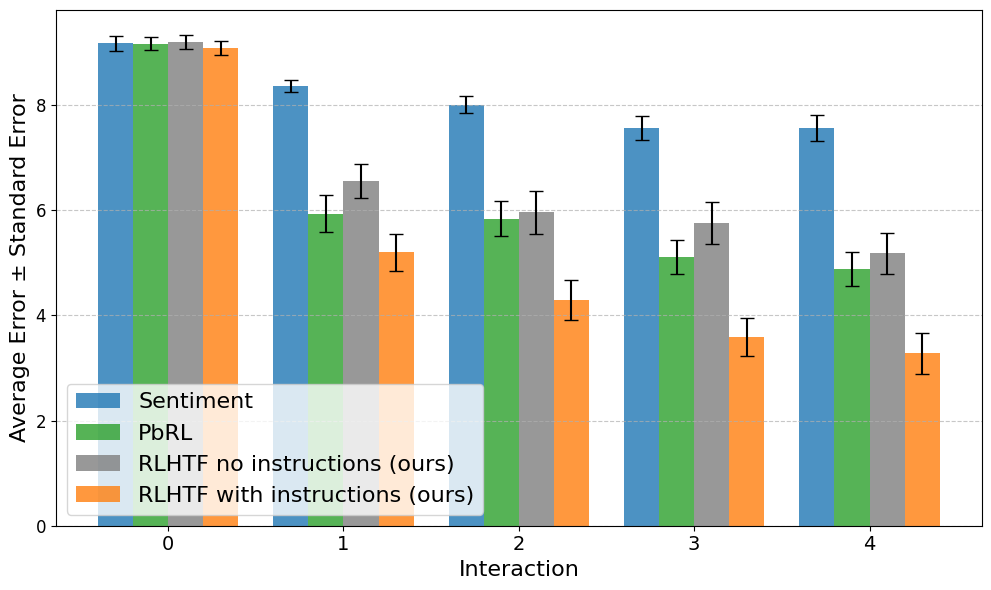

In [29]:
# Create the x-axis positions for the bars
x = np.arange(5)  # 5 steps

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Width of the bars
bar_width = 0.2

# Position offsets for the bars
positions = {
    'score_sentiment': x - 1.5 * bar_width,
    'score_pbrl': x - 0.5 * bar_width,
    'score_rlhtfnoinstruct': x + 0.5 * bar_width,
    'score_rlhtf': x + 1.5 * bar_width
}

# Define custom labels for the legend
legend_labels = ['Sentiment', 'PbRL', 'RLHTF no instructions (ours)', 'RLHTF with instructions (ours)']
colors=['#1f77b4', '#2ca02c', '#7f7f7f', '#ff7f0e']#colors=['grey', 'lightgreen', 'red', 'orange']

# Plot the bars and error bars for each score type
for i, score_type in enumerate(means):
    adjusted_means = [10 - value for value in means[score_type]]
    ax.bar(positions[score_type], adjusted_means, bar_width, label=legend_labels[i],color=colors[i], alpha=0.8, yerr=stes[score_type], capsize=5)

# Labeling the plot with increased font size
ax.set_xlabel('Interaction', fontsize=16)  # Change the fontsize as needed
ax.set_ylabel('Average Error ± Standard Error', fontsize=16)
#ax.set_title('Scores by Step with Mean and STE', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels([f'{i}' for i in x], fontsize=14)  # Adjust fontsize for x-tick labels
ax.legend(loc='lower left', fontsize=16)  # Adjust fontsize for the legend

# Show the plot
plt.tight_layout()

# Optionally, you can adjust the y-tick labels font size as well
ax.tick_params(axis='y', labelsize=12)  # Adjust fontsize for y-tick labels


# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [30]:
import pickle
# Load the variables from the file
with open('true_trajectory_vs_state.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

# Access the loaded variables
deviation_mean_true_state = loaded_data['deviation_mean_true_state']
deviation_ste_true_state = loaded_data['deviation_ste_true_state']
deviation_mean_true_traj = loaded_data['deviation_mean_true_traj']
deviation_ste_true_traj = loaded_data['deviation_ste_true_traj']

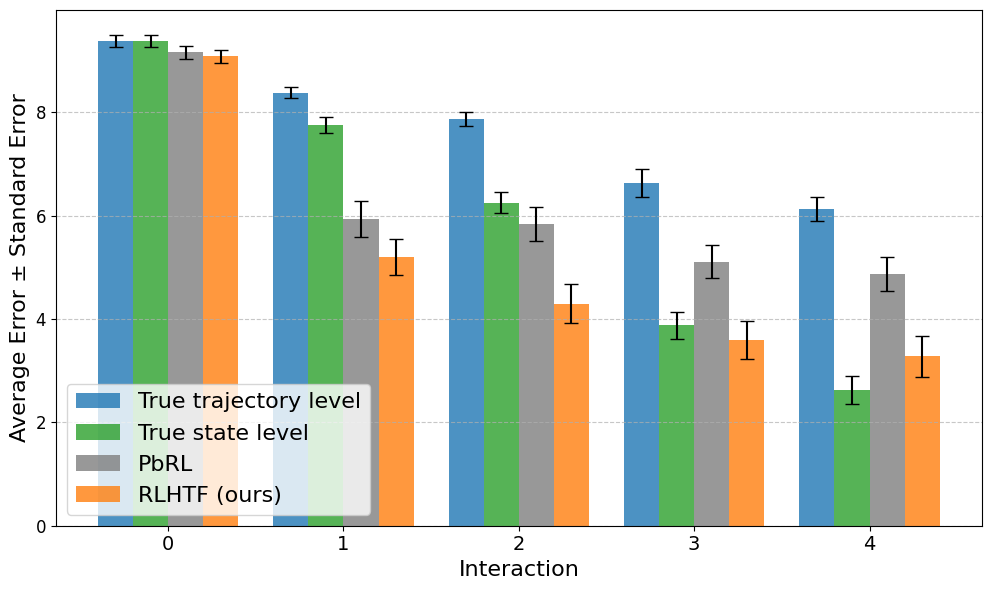

In [31]:
# Create the x-axis positions for the bars
x = np.arange(5)  # 5 steps

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Width of the bars
bar_width = 0.2

# Position offsets for the bars
positions = {
    'true_traj': x - 1.5 * bar_width,
    'true_state': x - 0.5 * bar_width,
    'score_pbrl': x + 0.5 * bar_width,
    'score_rlhtf': x + 1.5 * bar_width
}

ax.bar(positions['true_traj'], -deviation_mean_true_traj,
       bar_width,
       label='True trajectory level',
       color='#1f77b4',
       alpha=0.8,
       yerr=deviation_ste_true_traj,
       capsize=5)

ax.bar(positions['true_state'], -deviation_mean_true_state,
       bar_width,
       label='True state level',
       color= '#2ca02c',
       alpha=0.8,
       yerr=deviation_ste_true_state,
       capsize=5)

# Define the means and standard errors (replace these with the values you computed)
means = {
    'score_pbrl': score_pbrl_mean,
    'score_rlhtf': score_rlhtf_mean
}

# Define custom labels for the legend
legend_labels = ['True trajectory level', 'True state level',  'PbRL',  'RLHTF (ours)']
colors=['#7f7f7f', '#ff7f0e']

# Plot the bars and error bars for each score type
for i, score_type in enumerate(means):
    adjusted_means = [10 - value for value in means[score_type]]
    ax.bar(positions[score_type], adjusted_means, bar_width, label=legend_labels[i+2],
           color=colors[i], alpha=0.8, yerr=stes[score_type], capsize=5)
    

# Labeling the plot with increased font size
ax.set_xlabel('Interaction', fontsize=16)  # Change the fontsize as needed
ax.set_ylabel('Average Error ± Standard Error', fontsize=16)
#ax.set_title('Scores by Step with Mean and STE', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels([f'{i}' for i in x], fontsize=14)  # Adjust fontsize for x-tick labels
ax.legend(loc='lower left', fontsize=16)  # Adjust fontsize for the legend

# Show the plot
plt.tight_layout()

# Optionally, you can adjust the y-tick labels font size as well
ax.tick_params(axis='y', labelsize=12)  # Adjust fontsize for y-tick labels


# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

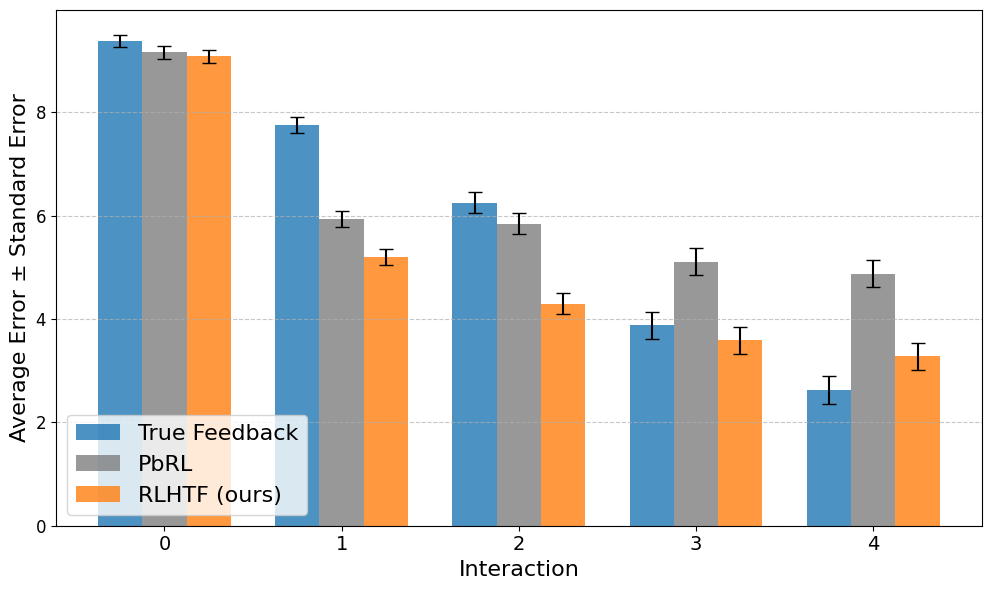

In [38]:
# Create the x-axis positions for the bars
x = np.arange(5)  # 5 steps

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Width of the bars
bar_width = 0.25

# Position offsets for the bars
positions = {
    'true_state': x - bar_width,
    'score_pbrl': x ,
    'score_rlhtf': x + bar_width
}

ax.bar(positions['true_state'], -deviation_mean_true_state,
       bar_width,
       label='True Feedback',
       color= '#1f77b4',
       alpha=0.8,
       yerr=deviation_ste_true_state,
       capsize=5)
ax.bar(positions['score_pbrl'], [10 - value for value in means['score_pbrl']],
       bar_width,
       label='PbRL',
       color= '#7f7f7f',
       alpha=0.8,
       yerr=deviation_ste_true_state,
       capsize=5)
ax.bar(positions['score_rlhtf'], [10 - value for value in means['score_rlhtf']],
       bar_width,
       label='RLHTF (ours)',
       color= '#ff7f0e',
       alpha=0.8,
       yerr=deviation_ste_true_state,
       capsize=5)


    

# Labeling the plot with increased font size
ax.set_xlabel('Interaction', fontsize=16)  # Change the fontsize as needed
ax.set_ylabel('Average Error ± Standard Error', fontsize=16)
#ax.set_title('Scores by Step with Mean and STE', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels([f'{i}' for i in x], fontsize=14)  # Adjust fontsize for x-tick labels
ax.legend(loc='lower left', fontsize=16)  # Adjust fontsize for the legend

# Show the plot
plt.tight_layout()

# Optionally, you can adjust the y-tick labels font size as well
ax.tick_params(axis='y', labelsize=12)  # Adjust fontsize for y-tick labels


# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

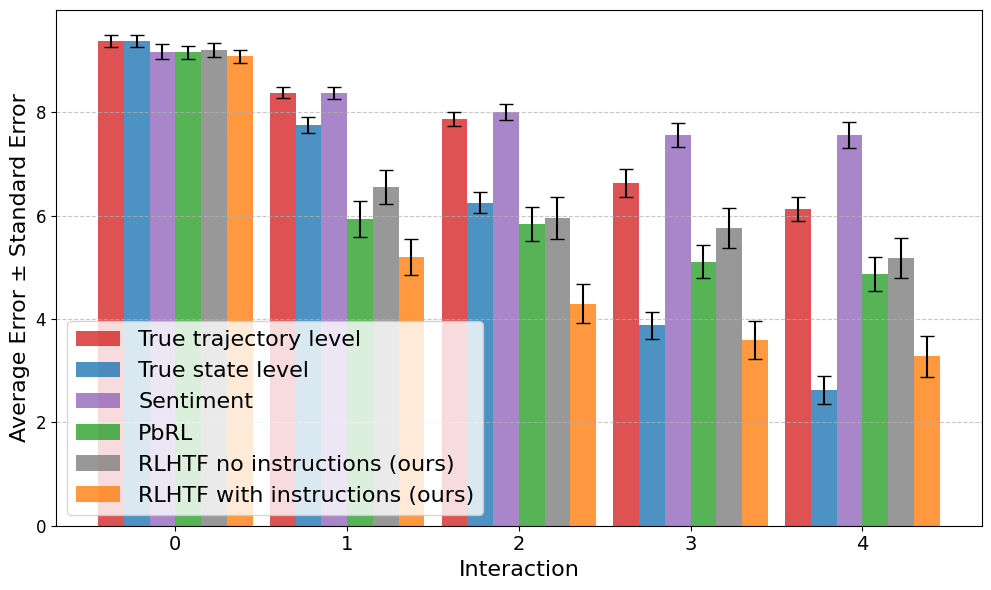

In [36]:
# Create the x-axis positions for the bars
x = np.arange(5)  # 5 steps

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Width of the bars
bar_width = 0.15

# Position offsets for the bars
positions = {
    'true_traj': x - 2.5 * bar_width,
    'true_state': x - 1.5 * bar_width,
    'score_sentiment': x - 0.5 * bar_width,
    'score_pbrl': x + 0.5 * bar_width,
    'score_rlhtfnoinstruct': x + 1.5 * bar_width,
    'score_rlhtf': x + 2.5 * bar_width
}

ax.bar(positions['true_traj'], -deviation_mean_true_traj,
       bar_width,
       label='True trajectory level',
       color='#d62728',
       alpha=0.8,
       yerr=deviation_ste_true_traj,
       capsize=5)

ax.bar(positions['true_state'], -deviation_mean_true_state,
       bar_width,
       label='True state level',
       color='#1f77b4',
       alpha=0.8,
       yerr=deviation_ste_true_state,
       capsize=5)

# Define custom labels for the legend
legend_labels = ['Sentiment', 'PbRL', 'RLHTF no instructions (ours)', 'RLHTF with instructions (ours)']
colors=['#9467bd', '#2ca02c', '#7f7f7f', '#ff7f0e']

# Plot the bars and error bars for each score type
for i, score_type in enumerate(means):
    adjusted_means = [10 - value for value in means[score_type]]
    ax.bar(positions[score_type], adjusted_means, bar_width, label=legend_labels[i],
           color=colors[i], alpha=0.8, yerr=stes[score_type], capsize=5)
    

# Labeling the plot with increased font size
ax.set_xlabel('Interaction', fontsize=16)  # Change the fontsize as needed
ax.set_ylabel('Average Error ± Standard Error', fontsize=16)
#ax.set_title('Scores by Step with Mean and STE', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels([f'{i}' for i in x], fontsize=14)  # Adjust fontsize for x-tick labels
ax.legend(loc='lower left', fontsize=16)  # Adjust fontsize for the legend

# Show the plot
plt.tight_layout()

# Optionally, you can adjust the y-tick labels font size as well
ax.tick_params(axis='y', labelsize=12)  # Adjust fontsize for y-tick labels


# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

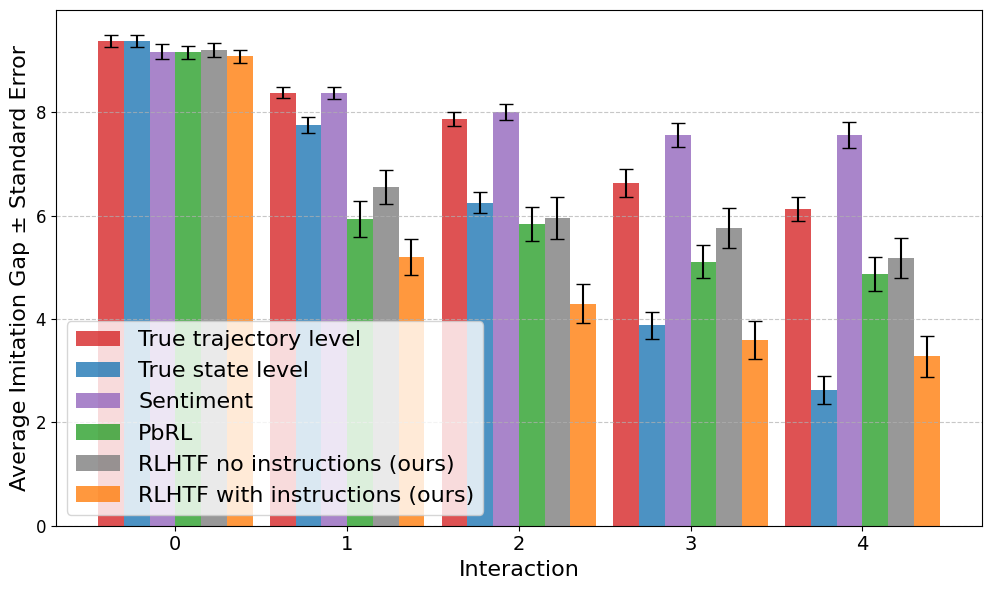

In [53]:
# Create the x-axis positions for the bars
x = np.arange(5)  # 5 steps

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Width of the bars
bar_width = 0.15

# Position offsets for the bars
positions = {
    'true_traj': x - 2.5 * bar_width,
    'true_state': x - 1.5 * bar_width,
    'score_sentiment': x - 0.5 * bar_width,
    'score_pbrl': x + 0.5 * bar_width,
    'score_rlhtfnoinstruct': x + 1.5 * bar_width,
    'score_rlhtf': x + 2.5 * bar_width
}

ax.bar(positions['true_traj'], -deviation_mean_true_traj,
       bar_width,
       label='True trajectory level',
       color='#d62728',
       alpha=0.8,
       yerr=deviation_ste_true_traj,
       capsize=5)

ax.bar(positions['true_state'], -deviation_mean_true_state,
       bar_width,
       label='True state level',
       color='#1f77b4',
       alpha=0.8,
       yerr=deviation_ste_true_state,
       capsize=5)

# Define custom labels for the legend
legend_labels = ['Sentiment', 'PbRL', 'RLHTF no instructions (ours)', 'RLHTF with instructions (ours)']
colors=['#9467bd', '#2ca02c', '#7f7f7f', '#ff7f0e']

# Plot the bars and error bars for each score type
for i, score_type in enumerate(means):
    adjusted_means = [10 - value for value in means[score_type]]
    ax.bar(positions[score_type], adjusted_means, bar_width, label=legend_labels[i],
           color=colors[i], alpha=0.8, yerr=stes[score_type], capsize=5)
    

# Labeling the plot with increased font size
ax.set_xlabel('Interaction', fontsize=16)  # Change the fontsize as needed
ax.set_ylabel('Average Imitation Gap ± Standard Error', fontsize=16)
#ax.set_title('Scores by Step with Mean and STE', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels([f'{i}' for i in x], fontsize=14)  # Adjust fontsize for x-tick labels
ax.legend(loc='lower left', fontsize=16)  # Adjust fontsize for the legend

# Show the plot
plt.tight_layout()

# Optionally, you can adjust the y-tick labels font size as well
ax.tick_params(axis='y', labelsize=12)  # Adjust fontsize for y-tick labels


# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
fig.savefig("plot.pdf", bbox_inches='tight')  # Save as PDF (better for LaTeX)

In [33]:
means

{'score_pbrl': [0.8392857142857143,
  4.071428571428571,
  4.160714285714286,
  4.892857142857143,
  5.125],
 'score_rlhtf': [0.9215686274509803,
  4.803921568627451,
  5.705882352941177,
  6.411764705882353,
  6.7254901960784315]}

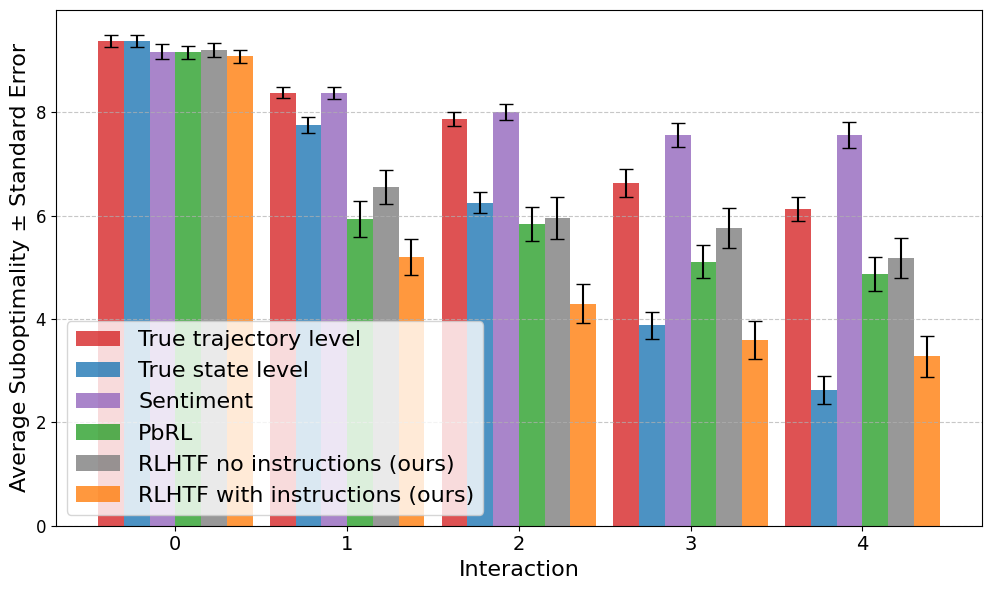

In [36]:
# Create the x-axis positions for the bars
x = np.arange(5)  # 5 steps

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Width of the bars
bar_width = 0.15

# Position offsets for the bars
positions = {
    'true_traj': x - 2.5 * bar_width,
    'true_state': x - 1.5 * bar_width,
    'score_sentiment': x - 0.5 * bar_width,
    'score_pbrl': x + 0.5 * bar_width,
    'score_rlhtfnoinstruct': x + 1.5 * bar_width,
    'score_rlhtf': x + 2.5 * bar_width
}

ax.bar(positions['true_traj'], -deviation_mean_true_traj,
       bar_width,
       label='True trajectory level',
       color='#d62728',
       alpha=0.8,
       yerr=deviation_ste_true_traj,
       capsize=5)

ax.bar(positions['true_state'], -deviation_mean_true_state,
       bar_width,
       label='True state level',
       color='#1f77b4',
       alpha=0.8,
       yerr=deviation_ste_true_state,
       capsize=5)

# Define custom labels for the legend
legend_labels = ['Sentiment', 'PbRL', 'RLHTF no instructions (ours)', 'RLHTF with instructions (ours)']
colors=['#9467bd', '#2ca02c', '#7f7f7f', '#ff7f0e']

# Plot the bars and error bars for each score type
for i, score_type in enumerate(means):
    adjusted_means = [10 - value for value in means[score_type]]
    ax.bar(positions[score_type], adjusted_means, bar_width, label=legend_labels[i],
           color=colors[i], alpha=0.8, yerr=stes[score_type], capsize=5)
    

# Labeling the plot with increased font size
ax.set_xlabel('Interaction', fontsize=16)  # Change the fontsize as needed
ax.set_ylabel('Average Suboptimality ± Standard Error', fontsize=16)
#ax.set_title('Scores by Step with Mean and STE', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels([f'{i}' for i in x], fontsize=14)  # Adjust fontsize for x-tick labels
ax.legend(loc='lower left', fontsize=16)  # Adjust fontsize for the legend

# Show the plot
plt.tight_layout()

# Optionally, you can adjust the y-tick labels font size as well
ax.tick_params(axis='y', labelsize=12)  # Adjust fontsize for y-tick labels


# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
fig.savefig("plot.pdf", bbox_inches='tight')  # Save as PDF (better for LaTeX)

In [51]:
deviation_mean_true_state 

0   -9.40
1   -7.80
2   -6.32
3   -3.94
4   -2.70
dtype: float64

In [28]:
exp_rlhtf_df = experiments_df[(experiments_df['ExperimentType'] == 'rlhtf')]
score_rlhtf= exp_rlhtf_df['Score']

mean_score_rlhtf = score_rlhtf.mean(axis=0)
std_score_rlhtf = score_rlhtf.std(axis=0)

In [29]:
print( mean_score_rlhtf ,std_score_rlhtf)

-3.3207547169811322 2.785771436491435


In [30]:
exp_rlhtfnoinstruct_df = experiments_df[(experiments_df['ExperimentType'] == 'rlhtfnoinstruct')]
score_rlhtfnoinstruct= exp_rlhtfnoinstruct_df['Score']

mean_score_rlhtfnoinstruct = score_rlhtfnoinstruct.mean(axis=0)
std_score_rlhtfnoinstruct = score_rlhtfnoinstruct.std(axis=0)

In [31]:
print( mean_score_rlhtfnoinstruct ,std_score_rlhtfnoinstruct)

-5.177777777777778 2.622359181494342


In [32]:
len(exp_sentiment_df)

41

In [33]:
stes

{'score_sentiment': [0.14775737786205814,
  0.11453031104267215,
  0.1600304849007244,
  0.23177149303813852,
  0.2470528246263532],
 'score_pbrl': [0.12425566885676752,
  0.35204148853153,
  0.32511415149572154,
  0.3199823163017381,
  0.32539935503891254],
 'score_rlhtfnoinstruct': [0.13706888336846837,
  0.32497949516598573,
  0.4007008450550534,
  0.39332249029167915,
  0.3909182260828038],
 'score_rlhtf': [0.1308887785747344,
  0.3464323580448278,
  0.37708283549005855,
  0.3653378458876545,
  0.3961366682093927]}

In [34]:
# Data for the plot
means = [-mean_score_PbRL, -mean_score_sentiment, -mean_score_rlhtfnoinstruct, -mean_score_rlhtf]
stes = [std_score_PbRL/np.sqrt(len(score_PbRL)), std_score_sentiment/np.sqrt(len(score_sentiment)), std_score_rlhtfnoinstruct/np.sqrt(len(score_rlhtfnoinstruct)), std_score_rlhtf/np.sqrt(len(score_rlhtf))]
labels = ['PbRL', 'Sentiment', 'RLHF (No Instr.)', 'RLHF (With Instr.)']

# Create the bar plot
x_positions = np.arange(len(means))

plt.bar(x_positions, means, yerr=stes, capsize=5, color=['skyblue', 'lightgreen', 'orange', 'purple'], alpha=0.8)

# Add labels and title
plt.xticks(x_positions, labels)
plt.ylabel('Final Error')

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

NameError: name 'mean_score_PbRL' is not defined

### Recover missing values 

#### 1st experiment's values that I didn't save

In [9]:
# Remove the rows where 'Labmate' is 0 and 'Day' is '3'
experiments_df = experiments_df[~((experiments_df['Labmate'] == 0) & (experiments_df['Day'] == '3'))]

In [11]:
to_complete['Deviation']

3       [-8, -6, -2, -2]
4        [-10, -4, 0, 0]
5        [-10, -4, 0, 0]
15     [-10, -5, -5, -5]
16      [-7, -3, -7, -3]
             ...        
142     [-6, -7, -8, -5]
143     [-5, -6, -5, -5]
147     [-8, -8, -6, -6]
148    [-10, -9, -8, -4]
149    [-10, -7, -1, -6]
Name: Deviation, Length: 72, dtype: object

In [10]:
to_complete = experiments_df[(experiments_df['ExperimentType'] == 'rlhtf')]

In [12]:
num_exp_greedy = len(to_complete)
deviation_greedy = np.zeros([num_exp_greedy, num_iters_per_experiment+1])
score = np.zeros([num_exp_greedy, 1])
for ee in range(num_exp_greedy):
    env = GridEnvironment(grid_width, grid_height, num_steps, [0,0])
    agent_Bernoulli = QLearningAgent_Bernoulli_greedy(env, alpha_init = 0.5, beta_init = 0.5)
    rewards_ee = to_complete['Data'].iloc[ee]['reward']
    certainty_ee = to_complete['Data'].iloc[ee]['certainty']
    road = to_complete['Data'].iloc[ee]['road'][1:]
    if ee != 38:
        for ii in range(num_iters_per_experiment):
            trajectory = agent_Bernoulli.get_optimal_trajectory()
            deviation_greedy[ee, ii] = calculate_deviation(trajectory, road)
            for ind_reward in rewards_ee[ii]:
                    temp_cert = certainty_ee[ii][ind_reward]
                    temp_reward = rewards_ee[ii][ind_reward]
                    for label_reward in range(len(temp_reward)):
                        if temp_reward[label_reward] == 'POS':
                            agent_Bernoulli.alpha[ind_reward] += temp_cert[label_reward]*agent_Bernoulli.scale
                        else:
                            agent_Bernoulli.beta[ind_reward] += temp_cert[label_reward]*agent_Bernoulli.scale
    else:
        for ii in range(num_iters_per_experiment-1):
            trajectory = agent_Bernoulli.get_optimal_trajectory()
            deviation_greedy[ee, ii] = calculate_deviation(trajectory, road)
            for ind_reward in rewards_ee[ii]:
                    temp_cert = certainty_ee[ii][ind_reward]
                    temp_reward = rewards_ee[ii][ind_reward]
                    for label_reward in range(len(temp_reward)):
                        if temp_reward[label_reward] == 'POS':
                            agent_Bernoulli.alpha[ind_reward] += temp_cert[label_reward]*agent_Bernoulli.scale
                        else:
                            agent_Bernoulli.beta[ind_reward] += temp_cert[label_reward]*agent_Bernoulli.scale
        trajectory = agent_Bernoulli.get_optimal_trajectory()
        deviation_greedy[ee, ii+1] = calculate_deviation(trajectory, road)
    deviation_greedy[ee, num_iters_per_experiment] = calculate_deviation(to_complete['Data'].iloc[ee]['learned_trajectory'], road)

In [13]:
deviation_greedy

array([[ -8.,  -6.,  -2.,  -2.,  -1.],
       [-10.,  -4.,   0.,   0.,   0.],
       [-10.,  -4.,   0.,   0.,   0.],
       [-10.,  -9.,  -5.,  -8.,  -5.],
       [-10.,  -8.,  -6.,  -8.,  -8.],
       [ -8.,  -3.,  -3.,  -3.,  -8.],
       [ -8.,  -8.,  -8.,  -8.,  -5.],
       [-10.,  -7.,  -6.,  -5.,  -5.],
       [-10.,  -7.,  -9.,  -9.,  -9.],
       [-10.,  -3.,  -3.,  -3.,  -3.],
       [ -8.,  -5.,  -8.,  -8.,  -8.],
       [-10.,  -8., -10.,  -8.,  -7.],
       [-10.,  -8.,  -6.,  -6.,  -8.],
       [ -8.,  -3.,  -3.,  -3.,  -3.],
       [-10., -10.,  -8.,  -8.,  -8.],
       [-10.,  -9.,  -3.,  -3.,  -2.],
       [-10.,  -7.,  -3.,  -4.,  -5.],
       [-10.,  -7.,  -4.,  -3.,  -4.],
       [-10.,  -9.,  -2.,  -2.,  -2.],
       [-10.,  -7.,  -7.,  -7.,  -7.],
       [-10.,  -5.,  -3.,  -3.,  -3.],
       [ -8.,  -8.,  -8.,  -8.,  -8.],
       [ -8.,  -8.,  -8.,  -8.,  -8.],
       [-10.,  -8.,  -8.,  -6.,  -8.],
       [ -8.,  -6.,  -8.,  -8.,  -8.],
       [ -8.,  -7.,  -7.,

In [14]:
rlhtf_indices = experiments_df[experiments_df['ExperimentType'] == 'rlhtf'].index
experiments_df.loc[rlhtf_indices, 'Score'] = score.flatten()
for i, idx in enumerate(rlhtf_indices):
    experiments_df.at[idx, 'Deviation'] = deviation_greedy[i].tolist()

C:\Users\Belen\anaconda3\envs\yolov8_v1\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## 1. Compare PbRL vs. RLHTF

In [47]:
# Calculate mean deviation per step
exp_PbRL_df = experiments_df[(experiments_df['ExperimentType'] == 'pbrl')]
deviation_lists = exp_PbRL_df['Deviation'].tolist()
deviation_df = pd.DataFrame(deviation_lists)
deviation_mean_PbRL = deviation_df.mean(axis=0)
deviation_std_PbRL = deviation_df.std(axis=0)
deviation_ste_PbRL = deviation_std_PbRL / np.sqrt(len(deviation_df))

exp_RLHTF_df = experiments_df[(experiments_df['ExperimentType'] == 'rlhtf')]
deviation_lists = exp_RLHTF_df['Deviation'].tolist()
deviation_df = pd.DataFrame(deviation_lists)
deviation_mean_RLHTF = deviation_df.mean(axis=0)
deviation_std_RLHTF = deviation_df.std(axis=0)
deviation_ste_RLHTF = deviation_std_RLHTF / np.sqrt(len(deviation_df))

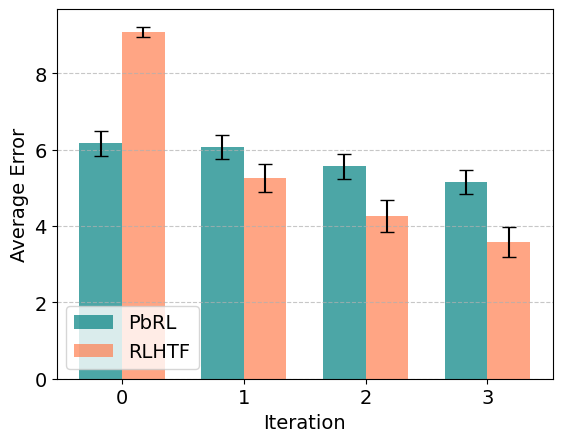

In [48]:
# Create a bar plot with error bars
width = 0.35  # width of the bars
indices_PbRL = range(len(deviation_mean_PbRL))
indices_RLHTF = [i + width for i in indices_PbRL]

plt.bar(indices_PbRL, -deviation_mean_PbRL, width, \
        yerr=deviation_ste_PbRL, capsize=5, label='PbRL', color='teal', alpha=0.7)
plt.bar(indices_RLHTF, -deviation_mean_RLHTF, width,\
        yerr=deviation_ste_RLHTF,capsize=5, label='RLHTF', color='coral', alpha=0.7)

# Update xticks to include the indices for final deviation, if necessary
xticks_positions = [i - width/2 for i in indices_RLHTF] 
xticks_labels = list(deviation_mean_PbRL.index) #+ ['4']
plt.xticks(xticks_positions, xticks_labels, fontsize=14)#, rotation=90)
plt.yticks(fontsize=14)

plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Average Error', fontsize=14)
#plt.title('Mean and Standard Deviation of Deviation')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.legend(loc='lower left', fontsize=14)
plt.show()


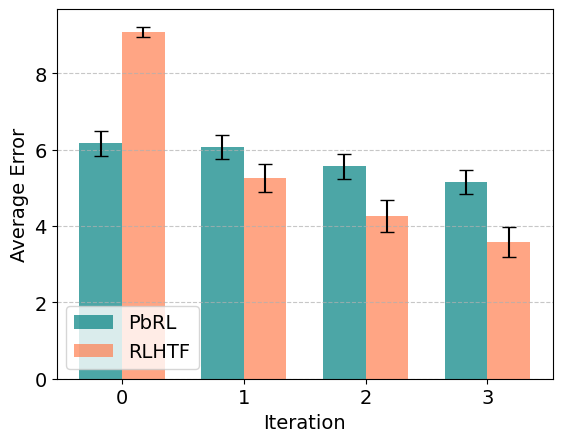

In [49]:
# Create a bar plot with error bars
width = 0.35  # width of the bars
indices_PbRL = range(len(deviation_mean_PbRL))
indices_RLHTF = [i + width for i in indices_PbRL]

plt.bar(indices_PbRL, -deviation_mean_PbRL, width, \
        yerr=deviation_ste_PbRL, capsize=5, label='PbRL', color='teal', alpha=0.7)
plt.bar(indices_RLHTF, -deviation_mean_RLHTF, width,\
        yerr=deviation_ste_RLHTF,capsize=5, label='RLHTF', color='coral', alpha=0.7)

# Update xticks to include the indices for final deviation, if necessary
xticks_positions = [i - width/2 for i in indices_RLHTF] 
xticks_labels = list(deviation_mean_PbRL.index) #+ ['4']
plt.xticks(xticks_positions, xticks_labels, fontsize=14)#, rotation=90)
plt.yticks(fontsize=14)

plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Average Error', fontsize=14)
#plt.title('Mean and Standard Deviation of Deviation')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.legend(loc='lower left', fontsize=14)
plt.show()


## PbRL vs RLHTF - Greedy vs. UCB

In [150]:
list_of_scores = []
exp_PbRL_df = experiments_df[(experiments_df['AgentType'] == 'greedy') & (experiments_df['ExperimentType'] == 'pbrl')]
list_of_scores.append(np.array(exp_PbRL_df['Deviation'].tolist()))

exp_PbRL_df = experiments_df[(experiments_df['AgentType'] == 'ucb') & (experiments_df['ExperimentType'] == 'pbrl')]
list_of_scores.append(np.array(exp_PbRL_df['Deviation'].tolist()))

exp_PbRL_df = experiments_df[(experiments_df['AgentType'] == 'greedy') & (experiments_df['ExperimentType'] == 'rlhtf')]
list_of_scores.append(np.array(exp_PbRL_df['Deviation'].tolist()))

exp_PbRL_df = experiments_df[(experiments_df['AgentType'] == 'ucb') & (experiments_df['ExperimentType'] == 'rlhtf')]
list_of_scores.append(np.array(exp_PbRL_df['Deviation'].tolist()))

labels = ["PbRL and Greedy", "PbRL and UCB", "RLHTF and Greedy", "RLHTF and UCB"]

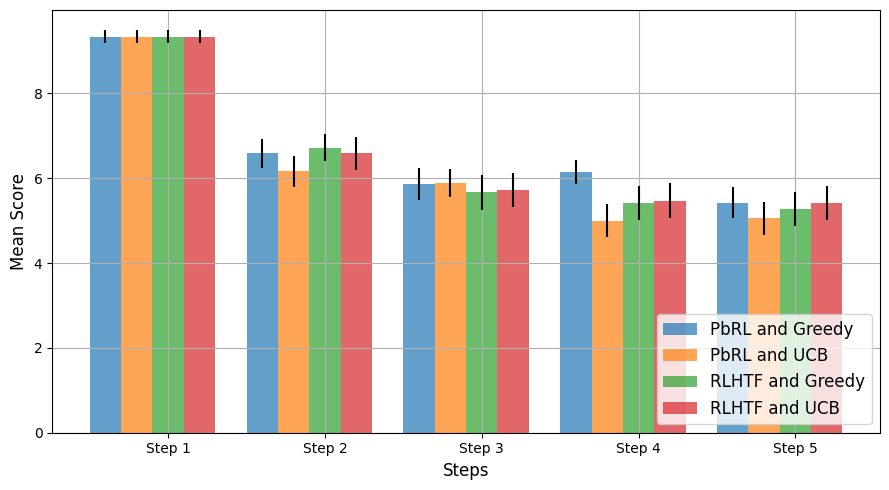

In [151]:
plot_mean_scores_bars(list_of_scores, labels, "")

## PbRL vs RLHTF - Greedy vs. UCB - One Room at a time

In [154]:
exp_num = 1
title = f"Room {exp_num}"
list_of_scores = []
exp_PbRL_df = experiments_df[(experiments_df['ExperimentNumber'] == exp_num) & (experiments_df['AgentType'] == 'greedy') & (experiments_df['ExperimentType'] == 'pbrl')]
list_of_scores.append(np.array(exp_PbRL_df['Deviation'].tolist()))

exp_PbRL_df = experiments_df[(experiments_df['ExperimentNumber'] == exp_num) & (experiments_df['AgentType'] == 'ucb') & (experiments_df['ExperimentType'] == 'pbrl')]
list_of_scores.append(np.array(exp_PbRL_df['Deviation'].tolist()))

exp_PbRL_df = experiments_df[(experiments_df['ExperimentNumber'] == exp_num) & (experiments_df['AgentType'] == 'greedy') & (experiments_df['ExperimentType'] == 'rlhtf')]
list_of_scores.append(np.array(exp_PbRL_df['Deviation'].tolist()))

exp_PbRL_df = experiments_df[(experiments_df['ExperimentNumber'] == exp_num) & (experiments_df['AgentType'] == 'ucb') & (experiments_df['ExperimentType'] == 'rlhtf')]
list_of_scores.append(np.array(exp_PbRL_df['Deviation'].tolist()))

labels = ["PbRL and Greedy", "PbRL and UCB", "RLHTF and Greedy", "RLHTF and UCB"]

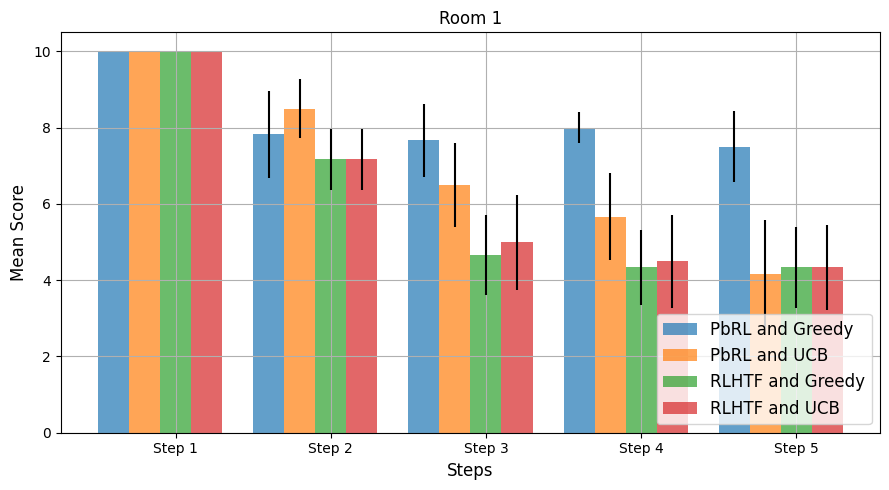

In [155]:
plot_mean_scores_bars(list_of_scores, labels, title)

## PbRL vs RLHTF - Greedy - Labmates

In [156]:
exp_greedy_df = experiments_df[experiments_df['AgentType'] == 'greedy']

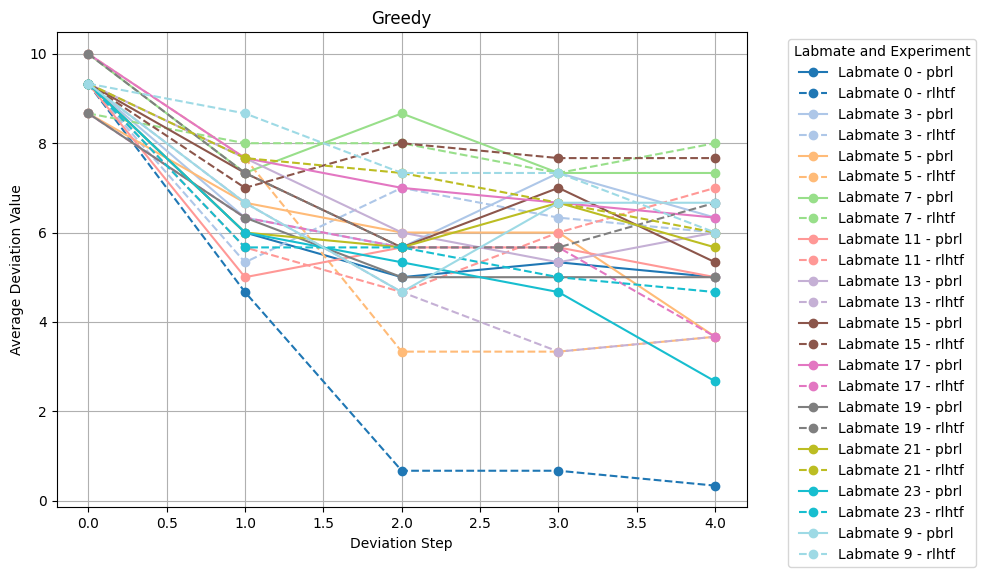

In [157]:
# Create a plot
plt.figure(figsize=(10, 6))

# Use a color map to generate a consistent color for each labmate
colors = plt.cm.get_cmap('tab20', len(exp_greedy_df['Labmate'].unique()))

# Group the dataframe by Labmate
for i, labmate in enumerate(exp_greedy_df['Labmate'].unique()):
    # Get data for the current labmate
    labmate_data = experiments_df[experiments_df['Labmate'] == labmate]
    
    # Calculate the mean deviations for 'pbrl' and 'rlhtf'
    pbrl_data = labmate_data[labmate_data['ExperimentType'] == 'pbrl']['Deviation'].apply(pd.Series)
    rlhtf_data = labmate_data[labmate_data['ExperimentType'] == 'rlhtf']['Deviation'].apply(pd.Series)
    
    # Compute the mean deviation at each index (step) across all experiments
    pbrl_mean = pbrl_data.mean()
    rlhtf_mean = rlhtf_data.mean()

    # Define the same color for both pbrl and rlhtf for the same labmate
    color = colors(i)
    
    # Plot the 'pbrl' line (solid line)
    plt.plot(-pbrl_mean, marker='o', color=color, label=f'Labmate {labmate} - pbrl')

    # Plot the 'rlhtf' line (dashed line)
    plt.plot(-rlhtf_mean, marker='o', linestyle='--', color=color, label=f'Labmate {labmate} - rlhtf')

# Add labels and title
plt.xlabel('Deviation Step')
plt.ylabel('Average Deviation Value')
plt.title('Greedy')
plt.legend(title='Labmate and Experiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


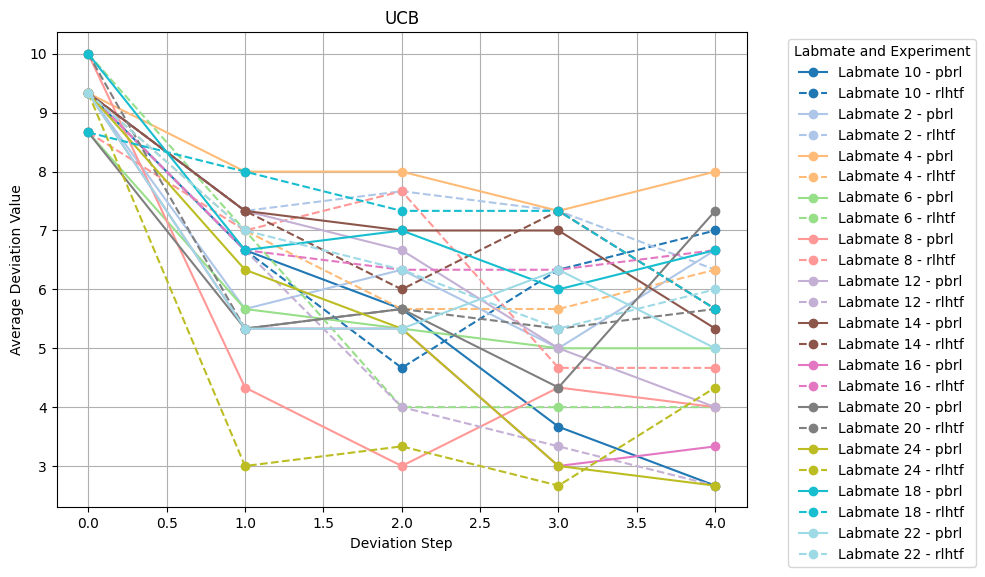

In [158]:
exp_ucb_df = experiments_df[experiments_df['AgentType'] == 'ucb']
# Create a plot
plt.figure(figsize=(10, 6))

# Use a color map to generate a consistent color for each labmate
colors = plt.cm.get_cmap('tab20', len(exp_ucb_df['Labmate'].unique()))

# Group the dataframe by Labmate
for i, labmate in enumerate(exp_ucb_df['Labmate'].unique()):
    # Get data for the current labmate
    labmate_data = experiments_df[experiments_df['Labmate'] == labmate]
    
    # Calculate the mean deviations for 'pbrl' and 'rlhtf'
    pbrl_data = labmate_data[labmate_data['ExperimentType'] == 'pbrl']['Deviation'].apply(pd.Series)
    rlhtf_data = labmate_data[labmate_data['ExperimentType'] == 'rlhtf']['Deviation'].apply(pd.Series)
    
    # Compute the mean deviation at each index (step) across all experiments
    pbrl_mean = pbrl_data.mean()
    rlhtf_mean = rlhtf_data.mean()

    # Define the same color for both pbrl and rlhtf for the same labmate
    color = colors(i)
    
    # Plot the 'pbrl' line (solid line)
    plt.plot(-pbrl_mean, marker='o', color=color, label=f'Labmate {labmate} - pbrl')

    # Plot the 'rlhtf' line (dashed line)
    plt.plot(-rlhtf_mean, marker='o', linestyle='--', color=color, label=f'Labmate {labmate} - rlhtf')

# Add labels and title
plt.xlabel('Deviation Step')
plt.ylabel('Average Deviation Value')
plt.title('UCB')
plt.legend(title='Labmate and Experiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


# Quality of Prompt

#### Deviations for pbrl

In [25]:
rlhtf_experiments = experiments_df[(experiments_df['ExperimentType'] == 'rlhtf')]

In [30]:
rlhtf_experiments

,Day,Labmate,ExperimentType,AgentType,ExperimentNumber,Data,Deviation,Score,PromptQuality
3,15,0,rlhtf,greedy,0,{'human_feedback': ['the first two steps are c...,"[-8.0, -6.0, -2.0, -2.0, -1.0]",0.0,1
4,15,0,rlhtf,greedy,1,{'human_feedback': ['all wrong. you should go ...,"[-10.0, -4.0, 0.0, 0.0, 0.0]",0.0,1
5,15,0,rlhtf,greedy,2,{'human_feedback': ['all wrong. it should go b...,"[-10.0, -4.0, 0.0, 0.0, 0.0]",0.0,1
15,4,10,rlhtf,ucb,2,{'human_feedback': ['the trajectory should sta...,"[-10.0, -9.0, -5.0, -8.0, -5.0]",0.0,0
16,4,10,rlhtf,ucb,3,{'human_feedback': ['the agent needs to go fur...,"[-10.0, -8.0, -6.0, -8.0, -8.0]",0.0,0
...,...,...,...,...,...,...,...,...,...
142,6,18,rlhtf,ucb,4,{'human_feedback': ['you have to reach the sta...,"[-8.0, -8.0, -8.0, -8.0, -4.0]",0.0,0
143,6,18,rlhtf,ucb,5,{'human_feedback': ['move further along and re...,"[-10.0, -8.0, -6.0, -6.0, -7.0]",0.0,0
147,6,22,rlhtf,ucb,0,{'human_feedback': ['go forward two steps then...,"[-8.0, -9.0, -9.0, -6.0, -6.0]",0.0,0
148,6,22,rlhtf,ucb,1,{'human_feedback': ['go right till you are dir...,"[-10.0, -4.0, -4.0, -4.0, -4.0]",0.0,0


In [37]:
# Function to ask the user and save feedback in 'PromptQuality'
def evaluate_feedback(df):
    # Ensure we're working on a copy, not a slice
    df = df.copy()

    prompt_quality = []
    for index, row in df.iterrows():
        feedback = row['Data']['human_feedback']
        print(f"Feedback for entry {index}: {feedback}")
        
        # Ask the user for their response (0 or 1)
        while True:
            try:
                response = int(input("Is this good feedback? (0 = No, 1 = Yes): "))
                if response in [0, 1]:
                    break
                else:
                    print("Please enter 0 or 1.")
            except ValueError:
                print("Invalid input. Please enter 0 or 1.")
        
        prompt_quality.append(response)
    print(prompt_quality)
    # Use .loc to safely add the new column without warnings
    df.loc[:, 'PromptQuality'] = prompt_quality
    return df


In [40]:
rlhtf_experiments = evaluate_feedback(rlhtf_experiments)

Feedback for entry 3: ['the first two steps are correct. the last two steps are wrong. go above the toaster. finish at the point up and to the elft of the vase.', 'around the chair is wrong. above the toaster is good. the third step is wrong. to the left of the vase is wrong. the end point is amazing', 'the first 5 steps are great. the last three steps are very good. under the chair is bad.', 'under the chair is bad. the point up and to the right of the toaster is amazing']
Is this good feedback? (0 = No, 1 = Yes): 1
Feedback for entry 4: ['all wrong. you should go under the toilet and under the clock. in the clock and to the right of the clock is also good. to the right of the sink is bad but two steps to the right of the sink is good', 'the end point is perfect. in the toilet is bad. below the clock is good. the point up  and to the right of the clock is wrong. to the right of the clock is amazing', 'perfect!', 'amazing!']
Is this good feedback? (0 = No, 1 = Yes): 1
Feedback for entr

Is this good feedback? (0 = No, 1 = Yes): 0
Feedback for entry 46: ['go via the bed and just to the right of the microwave', 'stay close to the bed but go a bit further from the couch', 'take a right immediately after the microwave', 'better. three steps from the microwave take one step left']
Is this good feedback? (0 = No, 1 = Yes): 0
Feedback for entry 47: ['go via the bed and reach the clock. avoid the toilet and the couch though', 'mostly there. largely just translate your path left by one', 'remember you still need to reach the clock. also almost touch the bed in your journey from the left', 'please reach the clock']
Is this good feedback? (0 = No, 1 = Yes): 1
Feedback for entry 51: ['go between the chair and toaster, then go up and stop at the top right corner of the vase', 'you should end to the top right of the vase', 'move closer to the vase', 'move more up']
Is this good feedback? (0 = No, 1 = Yes): 0
Feedback for entry 52: ['start by going up, turn right as soon as you pass

Is this good feedback? (0 = No, 1 = Yes): 0
Feedback for entry 89: ['move to the right below the bed, move up close to the toaster and then move to the right by the end of the couch', 'move to the right below the bed, then move up until you are next to the toaster, and then move right till the end of the sofa.', 'move to the right until the end of the bed. move up until you reach the same horizontal where the microwave is, and then move to the right until the end of the sofa.', 'move to the right until the end of the bed, move up until you are between the microwave and the sofa. then move to the right of the sofa.']
Is this good feedback? (0 = No, 1 = Yes): 0
Feedback for entry 93: ['go above the toaster, while staying below the chair', 'left of the chair is bad. go under the chair and towards the pot and the clock', 'go above the toaster, and stay to the left of the pot', 'under the pot is bad. stay to the left of the pot and to the right of the chaiar ']
Is this good feedback? (0 = N

Is this good feedback? (0 = No, 1 = Yes): 1
Feedback for entry 131: ['everything is bad. go to the left of the clock. then go to the left of the toilet. then go to the right of the toilet.', 'everything is bad. go to the left of the clock. then go above the clock. then go to the left of the toilet. then go to the right of the toilet.', 'the end is good but the beginning is bad. go to the left of the clock and then go to the top of the clock.', 'the beginning is good but the end is bad. go to the left of the toilet. then go to the right of the toilet. then keep going.']
Is this good feedback? (0 = No, 1 = Yes): 1
Feedback for entry 135: ['reach the star on the sofa', 'the end point should be the yellow star on the right side on the sofa, and you need to bypass the bed.', 'you need to bypass a bed and a microwave.', 'the end point is correct. before that, firstly bypass the bed.']
Is this good feedback? (0 = No, 1 = Yes): 0
Feedback for entry 136: ['reach the star in the middle of the cl

In [41]:
rlhtf_experiments.to_json('rlhtf_experiments.json', orient='records', lines=True)


In [6]:
import pandas as pd

# Load the JSON file back into a DataFrame
rlhtf_experiments = pd.read_json('rlhtf_experiments.json', orient='records', lines=True)


In [11]:
len(rlhtf_experiments[rlhtf_experiments['PromptQuality']==1])

23

In [8]:
72 / (24*3)

1.0

In [9]:
24*3

72

# Optimal Policy Given RM

In [34]:
# Extract RM after 4 interactions
filtered_df["alpha_last"] = filtered_df["Data"].apply(lambda x: x["alpha"][-1] if x["alpha"] else np.nan)
filtered_df["beta_last"] = filtered_df["Data"].apply(lambda x: x["beta"][-1] if x["beta"] else np.nan)

C:\Users\bmart\anaconda3\envs\env_yolo\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bmart\anaconda3\envs\env_yolo\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
filtered_df['beta_last']

0      [0.5, 0.5, 1.5, 0.5, 0.5, 2.5, 0.5, 1.5, 0.5, ...
1      [0.5, 1.5, 1.5, 1.5, 0.5, 1.5, 0.5, 1.5, 2.5, ...
2      [0.5, 1.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...
3      [0.5, 1.5, 1.5, 1.5, 0.5, 0.5, 0.5, 0.5, 1.5, ...
5      [0.5, 1.5, 1.5, 1.5, 1.5, 0.5, 0.5, 0.5, 0.5, ...
                             ...                        
190    [0.5, 0.5, 0.5, 1.5, 0.5, 0.5, 0.5, 1.5, 0.5, ...
191    [0.5, 1.291, 1.291, 1.291, 1.291, 2.5, 1.5, 1....
192    [0.5, 1.5, 1.5, 1.5, 1.5, 2.278, 1.5, 1.5, 1.5...
193    [0.5, 1.5, 1.5, 1.5, 1.5, 3.056, 1.5, 1.5, 1.5...
194    [0.5, 1.5, 1.5, 1.5, 1.5, 1.58, 1.278, 1.278, ...
Name: beta_last, Length: 193, dtype: object